# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [13]:
# EDA Question 1A solution below:
north_df.head()
north_df["Rep ID"].value_counts().count()

np.int64(9)

#### EDA Question 1B:  How many reps are in the South branch?  

In [16]:
# EDA Question 1B solution Below:
south_df.head()
south_df["Rep ID"].value_counts().count()

np.int64(11)

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [18]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [118]:
south_df.tail()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


In [24]:
# EDA Question 2A solution Below:
north_df["Busy Minutes"].mean()
north_df["Not Ready Minutes"].mean()
north_df["Incoming Wait Time"].mean()
north_df["During Call Wait Time"].mean()

np.float64(2.9673469387755103)

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [29]:
# EDA Question 2B solution Below:
south_df["Busy Minutes"].mean()
south_df["Not Ready Minutes"].mean()
south_df["Incoming Wait Time"].mean()
south_df["During Call Wait Time"].mean()

np.float64(3.0764331210191083)

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [31]:
north_df["Time Block"].unique()

array(['9:00 AM', '11:00 AM', '4:00 PM', '12:00 PM', '2:00 PM', '3:00 PM',
       '1:00 PM', '10:00 AM', '5:00 PM'], dtype=object)

In [61]:
# EDA Question 3 solution Below:
north_9am = north_df.loc[north_df["Time Block"] == "9:00 AM", "Calls"].count()
north_10am = north_df.loc[north_df["Time Block"] == "10:00 AM", "Calls"].count()
north_11am = north_df.loc[north_df["Time Block"] == "11:00 AM", "Calls"].count()
north_12pm = north_df.loc[north_df["Time Block"] == "12:00 PM", "Calls"].count()
north_1pm = north_df.loc[north_df["Time Block"] == "1:00 PM", "Calls"].count()
north_2pm = north_df.loc[north_df["Time Block"] == "2:00 PM", "Calls"].count()
north_3pm = north_df.loc[north_df["Time Block"] == "3:00 PM", "Calls"].count()
north_4pm = north_df.loc[north_df["Time Block"] == "4:00 PM", "Calls"].count()
north_5pm = north_df.loc[north_df["Time Block"] == "5:00 PM", "Calls"].count()
south_9am = south_df.loc[south_df["Time Block"] == "9:00 AM", "Calls"].count()
south_10am = south_df.loc[south_df["Time Block"] == "10:00 AM", "Calls"].count()
south_11am = south_df.loc[south_df["Time Block"] == "11:00 AM", "Calls"].count()
south_12pm = south_df.loc[south_df["Time Block"] == "12:00 PM", "Calls"].count()
south_1pm = south_df.loc[south_df["Time Block"] == "1:00 PM", "Calls"].count()
south_2pm = south_df.loc[south_df["Time Block"] == "2:00 PM", "Calls"].count()
south_3pm = south_df.loc[south_df["Time Block"] == "3:00 PM", "Calls"].count()
south_4pm = south_df.loc[south_df["Time Block"] == "4:00 PM", "Calls"].count()
south_5pm = south_df.loc[south_df["Time Block"] == "5:00 PM", "Calls"].count()

print(north_9am + south_9am)
print(north_10am + south_10am)
print(north_11am + south_11am)
print(north_12pm + south_12pm)
print(north_1pm + south_1pm)
print(north_2pm + south_2pm)
print(north_3pm + south_3pm)
print(north_4pm + south_4pm)
print(north_5pm + south_5pm)

10
99
56
120
40
65
73
53
43


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99 
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [73]:
# Question 1 solution below
north_df.isna().sum()
south_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [ ]:
#First, I'm checking what information we have in the rows where we have missing data 
north_df[north_df.isna().any(axis=1)].head(10)
# I want to check if when someone did not have to wait they fill out those waiting times as zeros in the dataset 
north_df.loc[north_df["Incoming Wait Time"] == 0]
#the are not rows where incoming wait time is zero. Which makes me believe that they simply left the space blank in those situations 

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


In [ ]:
#First, I'm checking what information we have in the rows where we have missing data 
south_df[south_df.isna().any(axis=1)].head(10)
# I want to check if when someone did not have to wait they fill out those waiting times as zeros in the dataset 
south_df[south_df["Incoming Wait Time"] == 0]
#the are not rows where incoming wait time is zero. Which makes me believe that they simply left the space blank in those situations 

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls


#### Record your answer below:

> Your Answer:
In the North dataset there are 163 missing values in the "Incoming Wait Time" column. In the South dataset there are 188 missing values in the "Incoming Wait Time" column. I think I would change the missing values to zero, because it seems that where incoming
wait time did not happen (it was zero) they left the space blank instead of filling out the cell with zero (there are not zeros in the incoming wait time column). 

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [ ]:
# Cleaning Question 2 solution below:
#First, I'm going to see what are the values that exist in the column, to check what are the two separe "YES"
north_df["Sale"].unique()
#I have a YES with an space afterwards and the other one without space
#I will delete whitespaces and update the dataframe
north_df["Sale"] = north_df["Sale"].str.strip()


In [ ]:
#Checking that changes were made
north_df["Sale"].unique()

array(['NO', 'YES'], dtype=object)

##### Record your answer by below:
> Your Answer: First, I checked what were the values that existed in the column, finding "No", "Yes ", and "Yes". Then I deleted the
whitespaces and updated the dataframe using strip(). Finally, I checked that the changed were made and now all the "Yes" values were uniform. This is important so we have uniformity in the data and do not get biased responses. 

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [109]:
# Cleaning Question 3 solution below:
north_df.duplicated().any()
south_df.duplicated().any()
north_df.duplicated().sum()
south_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: There not duplicate values in the datasets, I used the duplicated method. I also use any and sum to double make sure that the results were consistent and I did not find any duplicates. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [ ]:
# Cleaning Question 4 solution below:
north_df = north_df.drop(["Unnamed: 0"], axis= 1)
south_df = south_df.drop(["Unnamed: 0"], axis= 1)

In [131]:
north_df.info()
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Branch                 245 non-null    object 
 1   Call Purpose           245 non-null    object 
 2   Time Block             245 non-null    object 
 3   Incoming or Outgoing   245 non-null    object 
 4   Queue                  245 non-null    object 
 5   Rep ID                 245 non-null    object 
 6   Sale                   245 non-null    object 
 7   Lost Call              245 non-null    int64  
 8   Abandoned              245 non-null    int64  
 9   Busy Minutes           245 non-null    int64  
 10  Not Ready Minutes      245 non-null    int64  
 11  Incoming Wait Time     82 non-null     float64
 12  During Call Wait Time  245 non-null    int64  
 13  Calls                  245 non-null    int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 26.9+ KB


##### Record your answer below:
> Your Answer: The column "Unnamed: 0" in both dataframes was not necessary. It was like the row ID, but when you are looking at the data in Python, it will show you the number of the row in case you need it. So basically we had this row ID number in the database twice. 

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [ ]:
# Create dataframe for the entire company named df
#since both dataframes have the same columns, I think stacking them one on top of the other is the best way of combining them
# for this I use concat, and then check how the new dataframe looks by using head() and tail()
df = pd.concat([north_df, south_df], axis=0)
df.head()
df.tail()


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1
313,South,Product Support,5:00 PM,Outgoing,D,George,NO,0,0,10,2,NaN,3,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [142]:
# Manipulation Question solution below:
df.groupby(["Branch", "Rep ID"])["Calls"].sum().sort_values(ascending=False)

Branch  Rep ID
North   Brent     37
South   Eric      35
        Randy     33
        Sandy     32
        Helga     31
North   Lilly     30
        Todd      29
South   George    29
        Kate      29
North   Duke      29
South   Karl      28
North   Joe       26
South   Susan     26
        Josh      26
        Sharon    25
North   Cam       24
        Xander    24
        Andy      23
        Amanda    23
South   Alice     20
Name: Calls, dtype: int64

##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent with 37 calls
- South Branch = Eric with 35 calls 

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [147]:
df["Abandoned"].unique()

array([1, 0])

In [151]:
# Manipulation Question 2 solution below:
avg_abandonment = df["Abandoned"].mean()
print(avg_abandonment * 100)
branch_abandonment = df.groupby("Branch")["Abandoned"].mean()
print(branch_abandonment * 100)

1.9677996422182469
Branch
North    2.857143
South    1.273885
Name: Abandoned, dtype: float64


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.96%
- Do any of these fall out of the optimal range of 2-5%? Only the North Branch falls into the optimal range with a Average Call Abandonment Rate of 2.86%.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [156]:
# Manipulation Question 3 solution below:
#incoming wait Time
service_level_com = (df["Incoming Wait Time"]<= 2).mean()*100
print(service_level_com)
branch_service_level = df.groupby("Branch").agg(service_level= ("Incoming Wait Time", lambda x: (x <= 2).mean()*100))
print(branch_service_level)


14.490161001788909
        service_level
Branch               
North       13.469388
South       15.286624


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%
- South Branch = 15.49%
- Company Wide = 14.49%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [160]:
# Manipulation Question 4 solution below:
asa_company = df["Incoming Wait Time"].mean()
print(asa_company)
asa_branch = df.groupby("Branch")["Incoming Wait Time"].mean()
print(asa_branch)

3.019230769230769
Branch
North    3.04878
South    3.00000
Name: Incoming Wait Time, dtype: float64


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds 
- Company Wide in seconds = 3.02 seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

C:\Users\adrir\AppData\Local\Temp\ipykernel_19148\1154570839.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


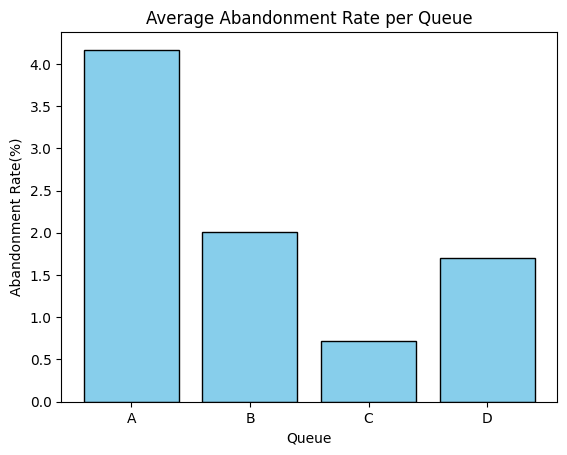

In [164]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import matplotlib.pyplot as plt
# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
queue_labels = list(abandonment_rates.keys())
rates = [v * 100 for v in abandonment_rates.values()]

plt.bar(queue_labels, rates, color = 'Skyblue', edgecolor = 'black')
plt.xlabel("Queue")
plt.ylabel("Abandonment Rate(%)")
plt.title("Average Abandonment Rate per Queue")

plt.show()

##### Record your answer below:

> Chart style you chose and why: I chose the bar charts because it allows us to see each queue individually but also if you would like to compare it with the other ones this type of graph would allows us to do it easily. 

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

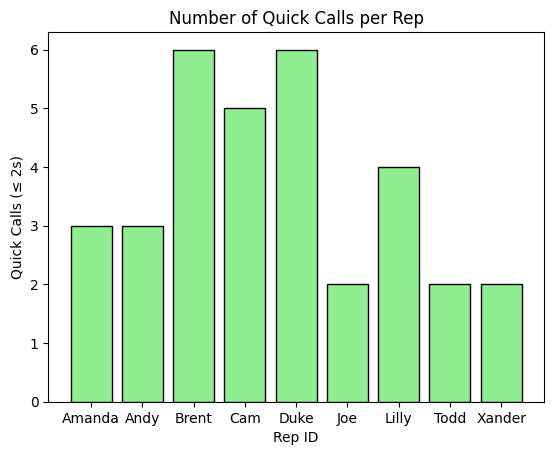

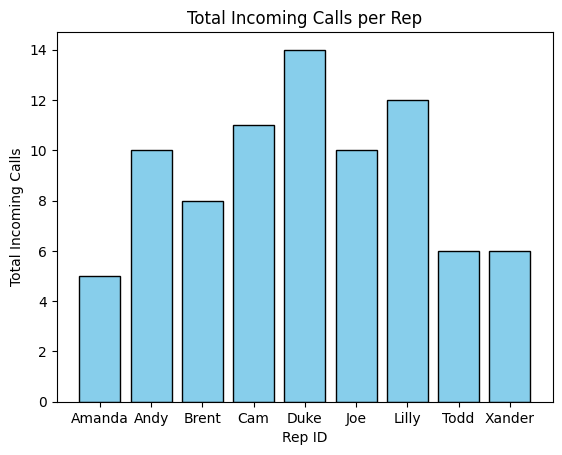

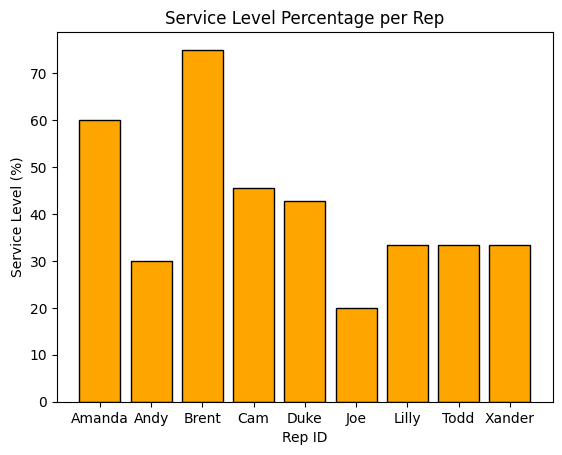

In [184]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
#Quick calls 
plt.bar(quick_stats.index, quick_stats["Calls"], color="lightgreen", edgecolor="black")
plt.xlabel("Rep ID")
plt.ylabel("Quick Calls (≤ 2s)")
plt.title("Number of Quick Calls per Rep")
plt.show()

#Total incoming calls 
plt.bar(total_stats.index, total_stats["Calls"], color="skyblue", edgecolor="black")
plt.xlabel("Rep ID")
plt.ylabel("Total Incoming Calls")
plt.title("Total Incoming Calls per Rep")
plt.show()

#Service level percentage per Rep
plt.bar(service_level.index, service_level["Service Level %"], color="orange", edgecolor="black")
plt.xlabel("Rep ID")
plt.ylabel("Service Level (%)")
plt.title("Service Level Percentage per Rep")

plt.show()



##### Record your answer below:

> Chart style you chose and why:  I chose bar charts again because I feel that is easier to see the results by Rep and compare among them if you'd like. Also, it was also helpful to make all of the visualization with the same type of chart so we can compare one with the other. 

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


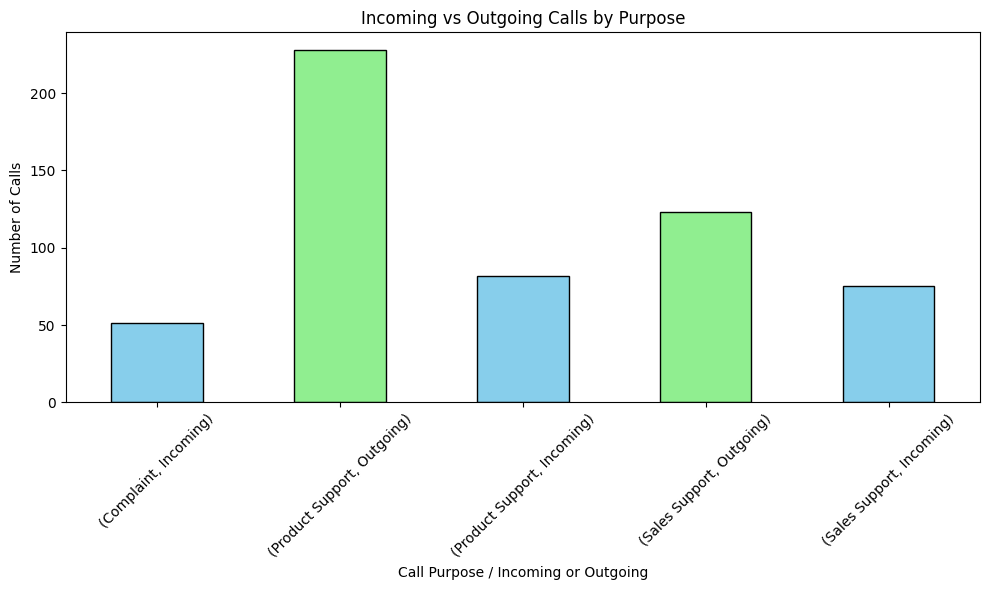

In [182]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
purpose_counts.plot(kind="bar", figsize=(10,6), color=["skyblue","lightgreen"], edgecolor="black")

plt.xlabel("Call Purpose / Incoming or Outgoing")
plt.ylabel("Number of Calls")
plt.title("Incoming vs Outgoing Calls by Purpose")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



##### Record your answer below:

> Chart style you chose and why: Bart charts are better to present the information and compare the purpose of the call and the incoming vs outgoing calls. 

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: The North Branch has an optimal avarage abandonment rate of 2.86%. The service level is very close for both of the branches, North Branch = 13.47% and South Branch = 15.49%, however, the South Branch has a better result. Finally, in regards with the avarage speed of answer the results are very close too, for the North Branch is 3.05 seconds and for the South Branch is 3.00 seconds, making the results of the North Branch a little bit better. Having all of this into account, the North Branch perfomrs better in two out of three indicators; therefore I would say it is operating slightly more efficently compared to the South Branch. 



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: North Branch has 9 representatives versus South Branch that has 11, then South Branch has a relative advantage because has two extra set of hands. However, when we analyze the KPIs we notice that North Branch is doing better, even when having less staff. Additionally, when we see the representative answering more quick calls, the ones who respond to more calls and the ones that have a better service level we notice some names that repeat across the charts that are Brent, Amanda, Cam, Duke, and Lilly. All of them are in the North Branch, which reaffrims the fact that this Branch is being more productive and having better outcomes. I would say that considering all of this, we can conclude that is the South Branch the one that needs the extra help. However, they already have two more people on staff and the results are not much better compared to the North Branch, so maybe we need to analyze which other variables are affecting the productivity of the representatives and implement different strategies for the South Branch. It could be the case that they need more training, or they do not have all the resources at work to be successful. Therefore, I would not consider that hiring more people would be the only solution to the problem. 


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: Maybe it would be interesting to know if the procedures, policies, and training are the same in both branches. I feel that this information could give us more perspective into what could be happening in one of the branches that is making it more successful compared with the  other one. Another variable that would be interesting to analize is the years of experience each representative has. It could be the case where the North Branch is really productive because its representatives have ton of experience in the call center world, versus the representatives in the South Branch, which could explain a lot in regards to the efficency and productivity the workers are showing. 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: Bar chart is the best way to present the information and to be able to see the difference between incoming and outgoing calls. 

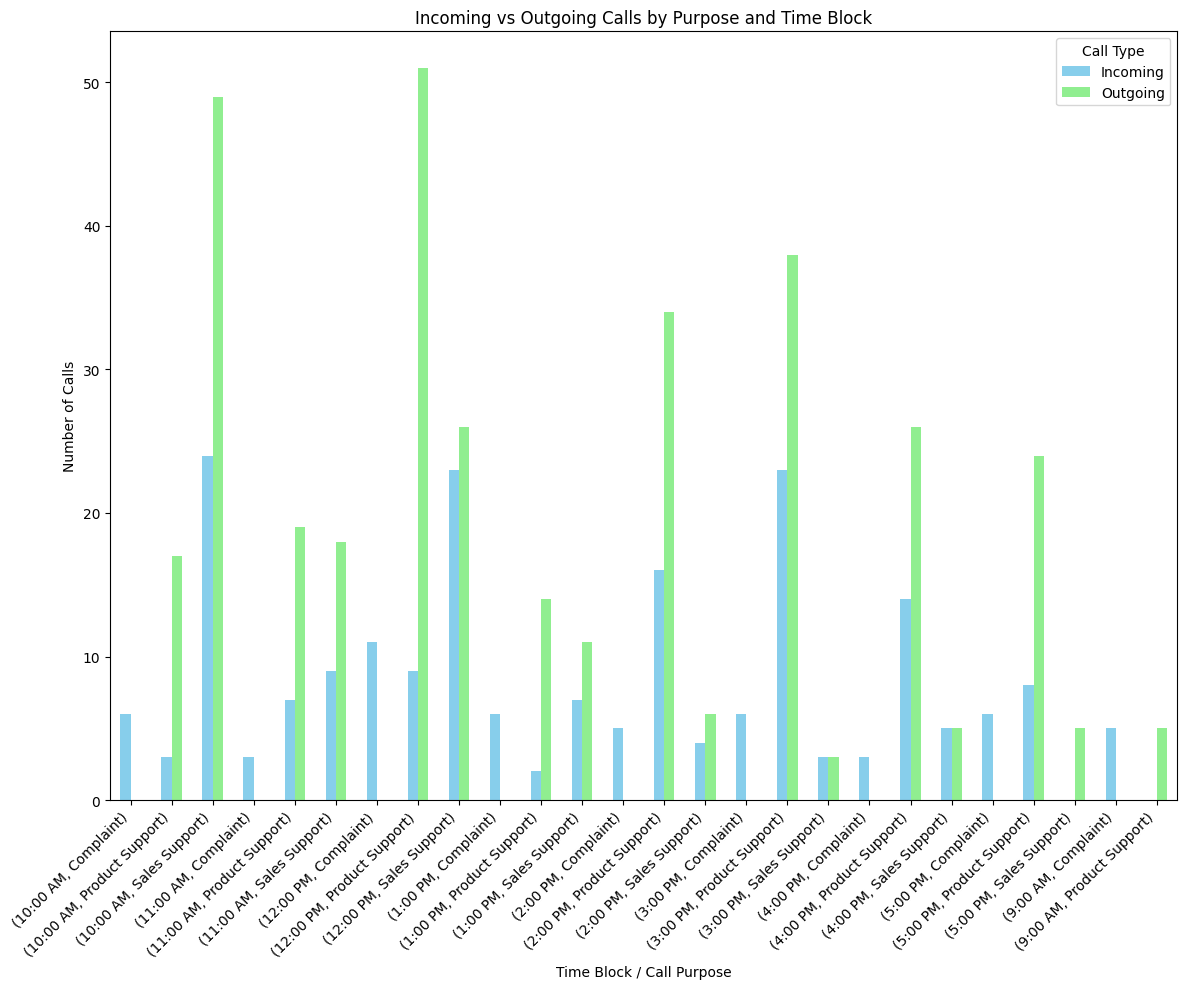

In [188]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
call_purp = (
    call_times.groupby(["Time Block", "Call Purpose", "Incoming or Outgoing"])["Calls"]
    .sum()
    .unstack(fill_value=0)
)

call_purp.plot(kind="bar",figsize = (12,10), color=["skyblue","lightgreen"])

plt.title("Incoming vs Outgoing Calls by Purpose and Time Block")
plt.xlabel("Time Block / Call Purpose")
plt.ylabel("Number of Calls")
plt.legend(title="Call Type")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()
